In [25]:
import tensorflow as tf
tf.__version__
# 28x28 images of hand-written digits 0-9
mnist = tf.keras.datasets.mnist 
#x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
#y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# normalizes tensor to hold values scaled from 0-1
# this make it easier for the AI to learn
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# Sequential is the most common model, feed forward like this image we drew.
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())

#hidden layers
# dense layer takes in (how many units(neurons) in a layer, activation function (what will make this neuron fire))
# relu math function returns 0 or the positive value the neuron returns.
# If its lower then 0 it will not return the lower value, it will only return 0
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# the output layer always has the number of classifications we are working with
# since this problem is finding numbers from 0-9 our input # is 10
# softmax probability distribution 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# loss is the degree of error (what it got wrong)
# nn dont try to get higher accuracy, they aim for minimizing loss
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2653 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1084 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0725 - accuracy: 0.9774


<function matplotlib.pyplot.show(*args, **kw)>

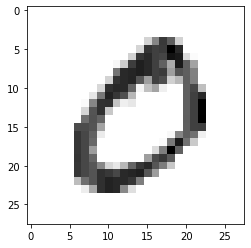

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show

In [27]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 862us/step - loss: 0.0896 - accuracy: 0.9734
0.0896202102303505 0.9733999967575073


INFO:tensorflow:Assets written to: mnist_num_reader\assets
2


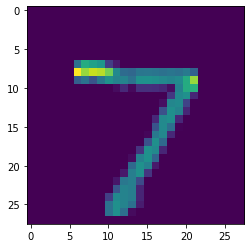

In [39]:
import numpy as np

# saving model
model.save('mnist_num_reader')

# load model
new_model = tf.keras.models.load_model('mnist_num_reader')

predictions = new_model.predict(x_test)

print(np.argmax(predictions[1]))

plt.imshow(x_test[0])
plt.show()